In [8]:
import pandas
data = pandas.read_csv('blood_pressure.csv')

In [9]:
data.head(20)

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
5,6,Male,30-45,150,147
6,7,Male,30-45,148,133
7,8,Male,30-45,153,141
8,9,Male,30-45,153,131
9,10,Male,30-45,158,125


In [10]:
data.isnull().sum()

patient      0
sex          0
agegrp       0
bp_before    0
bp_after     0
dtype: int64

In [11]:
data.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


In [12]:
array = data.values
array

array([[1, 'Male', '30-45', 143, 153],
       [2, 'Male', '30-45', 163, 170],
       [3, 'Male', '30-45', 153, 168],
       [4, 'Male', '30-45', 153, 142],
       [5, 'Male', '30-45', 146, 141],
       [6, 'Male', '30-45', 150, 147],
       [7, 'Male', '30-45', 148, 133],
       [8, 'Male', '30-45', 153, 141],
       [9, 'Male', '30-45', 153, 131],
       [10, 'Male', '30-45', 158, 125],
       [11, 'Male', '30-45', 149, 164],
       [12, 'Male', '30-45', 173, 159],
       [13, 'Male', '30-45', 165, 135],
       [14, 'Male', '30-45', 145, 159],
       [15, 'Male', '30-45', 143, 153],
       [16, 'Male', '30-45', 152, 126],
       [17, 'Male', '30-45', 141, 162],
       [18, 'Male', '30-45', 176, 134],
       [19, 'Male', '30-45', 143, 136],
       [20, 'Male', '30-45', 162, 150],
       [21, 'Male', '46-59', 149, 168],
       [22, 'Male', '46-59', 156, 155],
       [23, 'Male', '46-59', 151, 136],
       [24, 'Male', '46-59', 159, 132],
       [25, 'Male', '46-59', 164, 160],
       [2

In [13]:
X=array[0:1200,3:5]
X

array([[143, 153],
       [163, 170],
       [153, 168],
       [153, 142],
       [146, 141],
       [150, 147],
       [148, 133],
       [153, 141],
       [153, 131],
       [158, 125],
       [149, 164],
       [173, 159],
       [165, 135],
       [145, 159],
       [143, 153],
       [152, 126],
       [141, 162],
       [176, 134],
       [143, 136],
       [162, 150],
       [149, 168],
       [156, 155],
       [151, 136],
       [159, 132],
       [164, 160],
       [154, 160],
       [152, 136],
       [142, 183],
       [162, 152],
       [155, 162],
       [175, 151],
       [184, 139],
       [167, 175],
       [148, 184],
       [170, 151],
       [159, 171],
       [149, 157],
       [140, 159],
       [185, 140],
       [160, 174],
       [157, 167],
       [158, 158],
       [162, 168],
       [160, 159],
       [180, 153],
       [155, 164],
       [172, 169],
       [157, 148],
       [171, 185],
       [170, 163],
       [175, 146],
       [175, 160],
       [172,

In [14]:
#spliting into clusters
from sklearn.cluster import KMeans as km
model=km(n_clusters=12,random_state=42)
model.fit(X)

KMeans(n_clusters=12, random_state=42)

In [15]:
means = model.cluster_centers_
means

array([[180.75      , 157.        ],
       [147.85714286, 146.28571429],
       [149.71428571, 166.85714286],
       [145.92857143, 136.57142857],
       [181.66666667, 137.66666667],
       [170.1       , 162.3       ],
       [157.        , 155.16666667],
       [166.8       , 146.2       ],
       [158.4       , 132.26666667],
       [165.7       , 175.5       ],
       [143.6       , 156.4       ],
       [147.        , 180.        ]])

In [17]:
#creating a table for the groups
clusters=pandas.DataFrame(means,columns=['BP Before','BP After'] )
clusters

,BP Before,BP After
0,180.750000,157.000000
1,147.857143,146.285714
2,149.714286,166.857143
3,145.928571,136.571429
4,181.666667,137.666667
5,170.100000,162.300000
6,157.000000,155.166667
7,166.800000,146.200000
8,158.400000,132.266667
9,165.700000,175.500000


In [18]:
data["group_number"]=model.labels_
data.head(20)

,patient,sex,agegrp,bp_before,bp_after,group_number
0,1,Male,30-45,143,153,10
1,2,Male,30-45,163,170,9
2,3,Male,30-45,153,168,2
3,4,Male,30-45,153,142,1
4,5,Male,30-45,146,141,3
5,6,Male,30-45,150,147,1
6,7,Male,30-45,148,133,3
7,8,Male,30-45,153,141,1
8,9,Male,30-45,153,131,8
9,10,Male,30-45,158,125,8


<Axes: xlabel='group_number', ylabel='count'>

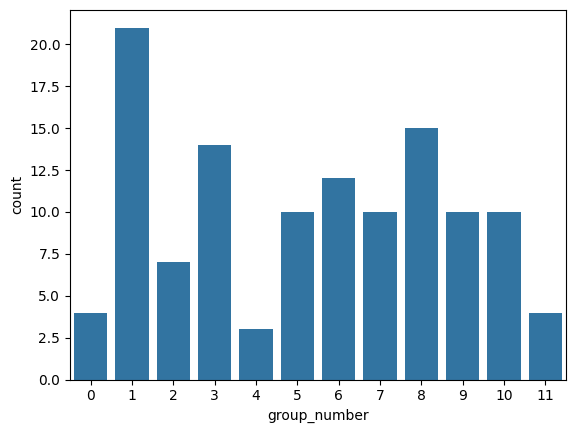

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data["group_number"])

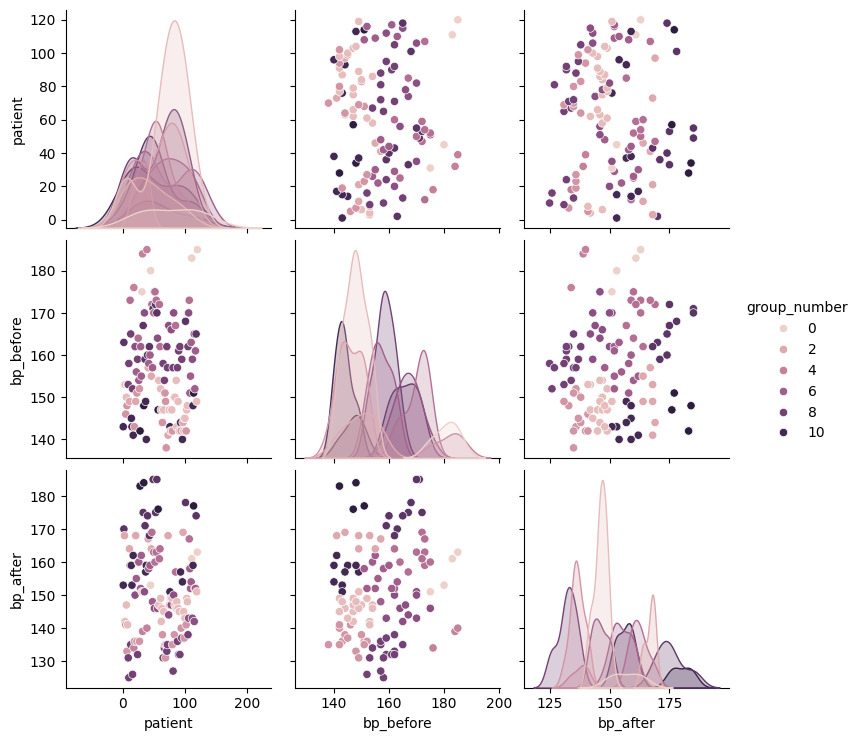

In [22]:
sns.pairplot(data,hue='group_number')